In [ ]:
# import modules
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# need to add nltk imports up here
# link: https://www.nltk.org/
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We read in the data and see this has a traditional database output, with some limited numeric columns. The best data is all the way to the right (comment fields!)

In the old days, I would've deleted these things since I had no use for them - but now, with all of the open-source software available, you can really bring that data to life and 1) not only explore it but 2) build models with it! Let's get to work.

In [ ]:
# we will read the file directly from this link
url = "/content/drive/MyDrive/DS using python/data/New Cleaned Dataset (2).xlsx"
dataframe = pd.read_excel(url, header = 0) # this means there is a header in the first row
df = pd.DataFrame(dataframe)
print(df.shape) # woah! 60K rows and 28 columns, very nice.
df.head()

(5726, 7)


,product_id,product_title,Brands,star_rating,verified_purchase,review_headline,review_body
0,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,2,Y,Cheap plastic feel. Speaker sounds good when y...,Cheap plastic feel. Hard to turn on and off as...
1,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,5,Y,Speaker,I bought this product to use with my iPod touc...
2,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,3,Y,Three Stars,Ok speaker for easy listening. But I don't do ...
3,B002PU9RO8,Altec Lansing inMotion MIX Digital Portable Bo...,ALTEC,3,Y,Three Stars,"Out dated iPhone system, not what I expected."
4,B00T7Z0BVW,Beats Pill Portable Speaker (Pink) - Newest Model,Beats,1,Y,... instructions and they don't answer emails ...,It doesn't stay charged 12 hours doesn't charg...


In [ ]:
df['new_rating'] = np.where(df['star_rating'] <= 3, 0, 1)

# check your work!
#print('The mean of medv is:', df['medv'].mean())
df.head()

,product_id,product_title,Brands,star_rating,verified_purchase,review_headline,review_body,new_rating
0,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,2,Y,Cheap plastic feel. Speaker sounds good when y...,Cheap plastic feel. Hard to turn on and off as...,0
1,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,5,Y,Speaker,I bought this product to use with my iPod touc...,1
2,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,3,Y,Three Stars,Ok speaker for easy listening. But I don't do ...,0
3,B002PU9RO8,Altec Lansing inMotion MIX Digital Portable Bo...,ALTEC,3,Y,Three Stars,"Out dated iPhone system, not what I expected.",0
4,B00T7Z0BVW,Beats Pill Portable Speaker (Pink) - Newest Model,Beats,1,Y,... instructions and they don't answer emails ...,It doesn't stay charged 12 hours doesn't charg...,0


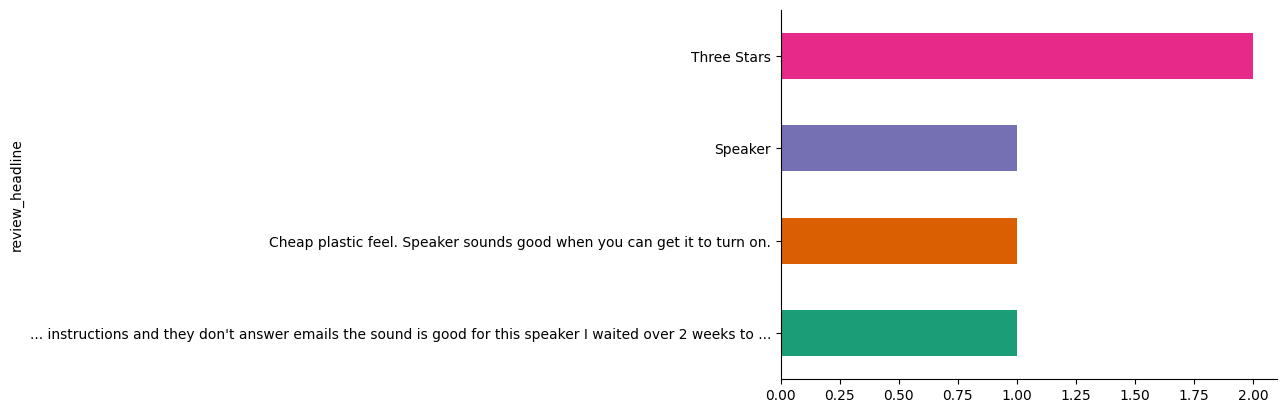

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('review_headline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Let's look at a sample text examples. There is a detailed column (EPISODE_NARRATIVE) and a more concise column (EVENT_NARRATIVE).

In [ ]:
# there's a more detailed column called "EPISODE_NARRATIVE"
print(df['review_body'][0])
print(df['review_body'][1])
print(df['review_body'][2])

Cheap plastic feel. Hard to turn on and off as it is difficult to twist. But if you can get past that, you get decent sound quality in a small portable speaker. Batteries last at least several hours. Recommend spending a little more on something like a Jambox and you will be much happier.
I bought this product to use with my iPod touch.  I use it at work a lot.  Plus, I use it when I workout.
Ok speaker for easy listening. But I don't do ANYTHING easy. So I bought a Bose!


As we are trying to classify event type based on the narrative, lets get rid of the rows where the data narrative is not available

In [ ]:
# Checking for null values in event narrative column
df.info()

# the data is MOSTLY good but has some nulls, so we drop it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         5726 non-null   object
 1   product_title      5726 non-null   object
 2   Brands             5726 non-null   object
 3   star_rating        5726 non-null   int64 
 4   verified_purchase  5726 non-null   object
 5   review_headline    5726 non-null   object
 6   review_body        5726 non-null   object
 7   new_rating         5726 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 358.0+ KB


We can make a nice barplot of the different storm types.

<ipython-input-51-f4162c2ee579>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


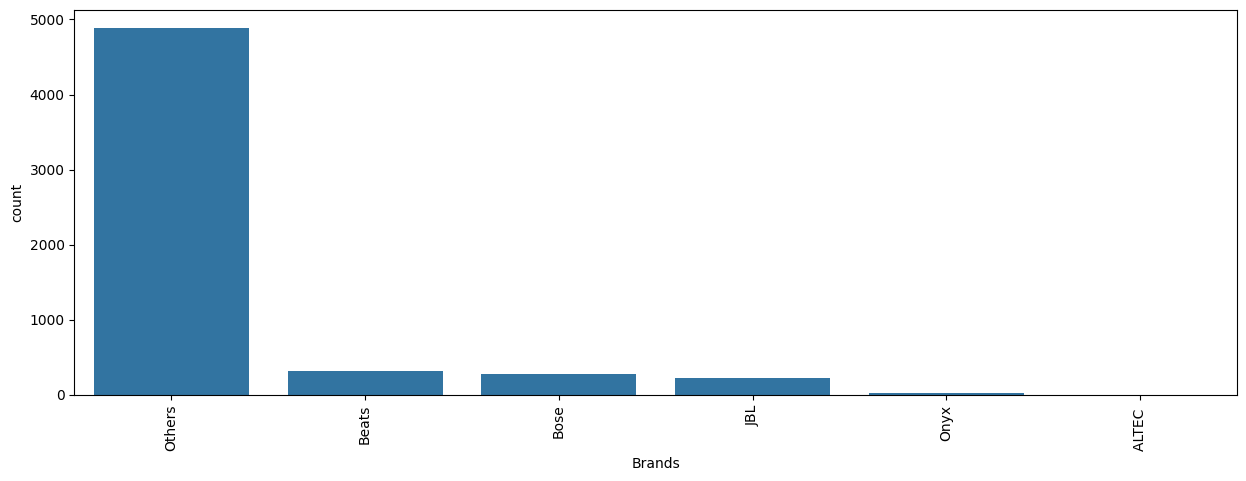

In [ ]:
# to sort by frequency...
# link: https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count

plt.figure(figsize=(15,5))
ax = sns.countplot(x="Brands", data=df,
                   order = df['Brands'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Remember, we've made three different versions of the data now:
* storm_df (original data)
* event_df (has only complete rows for text data)
* final_df (contains storms with as least 300 counts)

# Exploring the text data
Let's compare hail storms and flash floods and see what's going on.

# Subset Hail data
First things first - let's take a peak at just the hail storms.

In [ ]:
# before we get started, here are the first three rows
print(df['review_body'][0])
print(df['review_body'][1])
print(df['review_body'][2])

Cheap plastic feel. Hard to turn on and off as it is difficult to twist. But if you can get past that, you get decent sound quality in a small portable speaker. Batteries last at least several hours. Recommend spending a little more on something like a Jambox and you will be much happier.
I bought this product to use with my iPod touch.  I use it at work a lot.  Plus, I use it when I workout.
Ok speaker for easy listening. But I don't do ANYTHING easy. So I bought a Bose!


In [ ]:
# make everything lowercase
df['review_body'] = df['review_body'].str.lower()
df.head()

,product_id,product_title,Brands,star_rating,verified_purchase,review_headline,review_body,new_rating
0,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,2,Y,Cheap plastic feel. Speaker sounds good when y...,cheap plastic feel. hard to turn on and off as...,0
1,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,5,Y,Speaker,i bought this product to use with my ipod touc...,1
2,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,3,Y,Three Stars,ok speaker for easy listening. but i don't do ...,0
3,B002PU9RO8,Altec Lansing inMotion MIX Digital Portable Bo...,ALTEC,3,Y,Three Stars,"out dated iphone system, not what i expected.",0
4,B00T7Z0BVW,Beats Pill Portable Speaker (Pink) - Newest Model,Beats,1,Y,... instructions and they don't answer emails ...,it doesn't stay charged 12 hours doesn't charg...,0


In [ ]:
# here's an example of what we did
print(df['review_body'][0])
print(df['review_body'][1])
print(df['review_body'][2])

cheap plastic feel. hard to turn on and off as it is difficult to twist. but if you can get past that, you get decent sound quality in a small portable speaker. batteries last at least several hours. recommend spending a little more on something like a jambox and you will be much happier.
i bought this product to use with my ipod touch.  i use it at work a lot.  plus, i use it when i workout.
ok speaker for easy listening. but i don't do anything easy. so i bought a bose!


### Strip funky characters (!,~-@$% etc)
Funky characters can be a pain - they make words appear to be unique (think of trouble with strings). Let's ditch 'em!

In [ ]:
# Convert all entries in the 'review_body' column to strings
df["review_body"] = df["review_body"].astype(str)

In [ ]:
# Remove any funky characters with a blank, including handling extra spaces and trimming
df['review_body'] = df['review_body'].str.replace('[^a-zA-Z ]', '', regex=True).str.replace(' +', ' ', regex=True).str.strip()

# Display the cleaned DataFrame
df.head()

,product_id,product_title,Brands,star_rating,verified_purchase,review_headline,review_body,new_rating
0,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,2,Y,Cheap plastic feel. Speaker sounds good when y...,cheap plastic feel hard to turn on and off as ...,0
1,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,5,Y,Speaker,i bought this product to use with my ipod touc...,1
2,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,3,Y,Three Stars,ok speaker for easy listening but i dont do an...,0
3,B002PU9RO8,Altec Lansing inMotion MIX Digital Portable Bo...,ALTEC,3,Y,Three Stars,out dated iphone system not what i expected,0
4,B00T7Z0BVW,Beats Pill Portable Speaker (Pink) - Newest Model,Beats,1,Y,... instructions and they don't answer emails ...,it doesnt stay charged hours doesnt charge ano...,0


In [ ]:
# let's see what we did, no commas or periods!!!
print(df['review_body'][0])
print(df['review_body'][1])
print(df['review_body'][2])

cheap plastic feel hard to turn on and off as it is difficult to twist but if you can get past that you get decent sound quality in a small portable speaker batteries last at least several hours recommend spending a little more on something like a jambox and you will be much happier
i bought this product to use with my ipod touch i use it at work a lot plus i use it when i workout
ok speaker for easy listening but i dont do anything easy so i bought a bose


### Stop words
'Stop words' are simply common words in the English language - they are not special and generally don't convey too much information. So it's best to get rid of them.

In [ ]:
# let's remove some of the stop words (see what happens if you comment this cell out)
# we can do better!
# define some stop words
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!
print(stopwords.words('english'))

stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         5726 non-null   object
 1   product_title      5726 non-null   object
 2   Brands             5726 non-null   object
 3   star_rating        5726 non-null   int64 
 4   verified_purchase  5726 non-null   object
 5   review_headline    5726 non-null   object
 6   review_body        5726 non-null   object
 7   new_rating         5726 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 358.0+ KB


In [ ]:
# # Convert all entries in the 'review_body' column to strings
# df["review_body"] = df["review_body"].astype(str)

In [ ]:
# remove the stop words
# apply these stopwords to the data
# link: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe/43407993

# this looks good!
# ' '. adds a nice space (try adding a 'D' instead of ' ' and see what happens!)
df.head() # note how the stop words have been removed
df["review_body"] = df['review_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,product_id,product_title,Brands,star_rating,verified_purchase,review_headline,review_body,new_rating
0,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,2,Y,Cheap plastic feel. Speaker sounds good when y...,cheap plastic feel hard turn difficult twist g...,0
1,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,5,Y,Speaker,bought product use ipod touch use work lot plu...,1
2,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,3,Y,Three Stars,ok speaker easy listening dont anything easy b...,0
3,B002PU9RO8,Altec Lansing inMotion MIX Digital Portable Bo...,ALTEC,3,Y,Three Stars,dated iphone system expected,0
4,B00T7Z0BVW,Beats Pill Portable Speaker (Pink) - Newest Model,Beats,1,Y,... instructions and they don't answer emails ...,doesnt stay charged hours doesnt charge anothe...,0


In [ ]:
# let's see what we did, no commas or periods!!!
print(df['review_body'][0])
print(df['review_body'][1])
print(df['review_body'][2])

cheap plastic feel hard turn difficult twist get past get decent sound quality small portable speaker batteries last least several hours recommend spending little something like jambox much happier
bought product use ipod touch use work lot plus use workout
ok speaker easy listening dont anything easy bought bose


# Text EDA on the Hail Data

### Most common words
Word clouds and frequency tables/plots.

In [ ]:
# 1) what are the most common words in the EVENT_NARRATIVE? note that we are doing this before tokenizer
# you can also turn this into a bar plot!
myTable = df['review_body'].str.split(expand=True).stack().value_counts()
myTable[0:20] # too cool!

sound        3384
speaker      3136
good         1870
great        1798
br           1642
speakers     1488
one          1483
use          1382
would        1339
quality      1256
product      1114
like         1113
volume       1097
little       1023
music        1022
bluetooth     963
work          907
get           890
price         839
well          789
Name: count, dtype: int64

In [ ]:
# and we can make a frequency plot
# we'll group, then convert to pandas DataFrame for easy plotting
x = df['review_body'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head()

,word,frequency
0,sound,3384
1,speaker,3136
2,good,1870
3,great,1798
4,br,1642


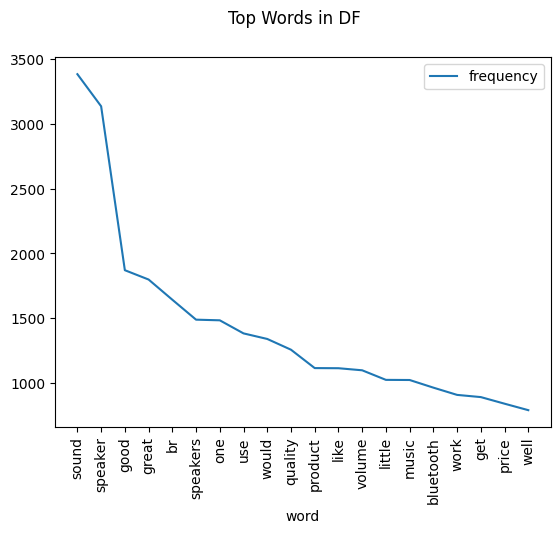

In [ ]:
# Frequency Distribution Plot
# look at first X words

# len(x) just the number of rows

x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in DF')
plt.show()


In [ ]:
# # if we wanted to, we could delete 'hail' so that the model isn't cheating!
# # to do this, we just need to append our stop words...

# # i will keep this commented out for now, but it's possible to do this and repeat the notebook!

# # not shown here, but like this
# # link: https://stackabuse.com/removing-stop-words-from-strings-in-python/#:~:text=Using%20Python's%20NLTK%20Library&text=NLTK%20supports%20stop%20word%20removal,stop%20words%20provided%20by%20NLTK.

# # import
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize

# sw_list = ['hail']
# stop.extend(sw_list)

# text_tokens = word_tokenize(str(hail_df["EVENT_NARRATIVE"]))
# tokens_without_sw = [word for word in text_tokens if not word in stop]

# print(tokens_without_sw) # see, now hail is gone!!!
# # would the model do just as well without hail in the description?

### Word Cloud
Instead of just word frequency, you can get a nice graphic like this! Words that are most common are large. You can read more about customization here:
https://www.datacamp.com/community/tutorials/wordcloud-python

You can be creative here!!!

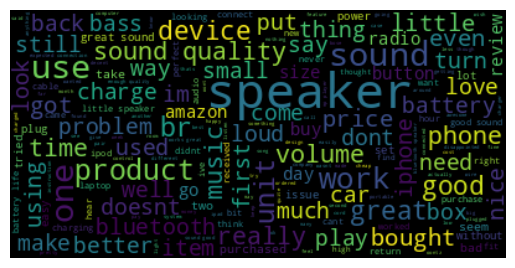

In [ ]:
# https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df['review_body']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df['review_body']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Tokenizer
The tokenizer takes a given sentence and parses it into a list with individual words separated by a comma. This makes it easy for us to do some feature engineering later on in the notebook.

In [ ]:
# tokenizer
# hello tokenizer! make this a list with individual entries/values
df['review_body'] = df.apply(lambda row: nltk.word_tokenize(row['review_body']), axis=1)
df.head()
# could also have created a new column?
# link: https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

,product_id,product_title,Brands,star_rating,verified_purchase,review_headline,review_body,new_rating
0,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,2,Y,Cheap plastic feel. Speaker sounds good when y...,"[cheap, plastic, feel, hard, turn, difficult, ...",0
1,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,5,Y,Speaker,"[bought, product, use, ipod, touch, use, work,...",1
2,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,3,Y,Three Stars,"[ok, speaker, easy, listening, dont, anything,...",0
3,B002PU9RO8,Altec Lansing inMotion MIX Digital Portable Bo...,ALTEC,3,Y,Three Stars,"[dated, iphone, system, expected]",0
4,B00T7Z0BVW,Beats Pill Portable Speaker (Pink) - Newest Model,Beats,1,Y,... instructions and they don't answer emails ...,"[doesnt, stay, charged, hours, doesnt, charge,...",0


In [ ]:
# here's what we did
print(df['review_body'][0])
print(df['review_body'][1])
print(df['review_body'][2])

['cheap', 'plastic', 'feel', 'hard', 'turn', 'difficult', 'twist', 'get', 'past', 'get', 'decent', 'sound', 'quality', 'small', 'portable', 'speaker', 'batteries', 'last', 'least', 'several', 'hours', 'recommend', 'spending', 'little', 'something', 'like', 'jambox', 'much', 'happier']
['bought', 'product', 'use', 'ipod', 'touch', 'use', 'work', 'lot', 'plus', 'use', 'workout']
['ok', 'speaker', 'easy', 'listening', 'dont', 'anything', 'easy', 'bought', 'bose']


### Summary
So what did we do? We processed our data to make it all lower case, got rid of funky characters, removed stop words and used the 'tokenizer' to start to parse our text data into something useable. Let's dig into some more examples.

# Lexicon Normalization
This is a fancy word that means we want to take the words (lexicon) and get them in some standardized fashion (normalization). Our goal is to simply the information in our model.

### Stemming
From DataCamp: Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connec".

How can we use this? Use these simpler representations of the words to build your model "connec" (0/1) vs. having three different 0/1 variables for 'connection', 'connected', 'connecting' etc. See where we are going with this? It's all about teaching the computer how to exploit this unstructured data!

In [ ]:
# we won't use this today, but sure, it's possible to chop a word down
# this cuts down on dimensionality
# using the example above, three words turn into one "connec"

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# this is the function we will use
ps = PorterStemmer()

filtered_sent = df['review_body'][2]

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

# in our example, we just got rid of "trained' and 'reported' etc.

Filtered Sentence: ['ok', 'speaker', 'easy', 'listening', 'dont', 'anything', 'easy', 'bought', 'bose']
Stemmed Sentence: ['ok', 'speaker', 'easi', 'listen', 'dont', 'anyth', 'easi', 'bought', 'bose']


In [ ]:
# if we wanted to, we could make a new column with just the stemmed words
# link: https://stackoverflow.com/questions/37443138/python-stemming-with-pandas-dataframe
df['Stemmed'] = df['review_body'].apply(lambda x: [ps.stem(y) for y in x]) # Stem every word.

In [ ]:
# check your work!
print(df['review_body'][0]) # reported
print(df['Stemmed'][0]) # report

print(df['review_body'][10]) # note the difference between inches, reported, covered
print(df['Stemmed'][10]) # inch, report, cover

['cheap', 'plastic', 'feel', 'hard', 'turn', 'difficult', 'twist', 'get', 'past', 'get', 'decent', 'sound', 'quality', 'small', 'portable', 'speaker', 'batteries', 'last', 'least', 'several', 'hours', 'recommend', 'spending', 'little', 'something', 'like', 'jambox', 'much', 'happier']
['cheap', 'plastic', 'feel', 'hard', 'turn', 'difficult', 'twist', 'get', 'past', 'get', 'decent', 'sound', 'qualiti', 'small', 'portabl', 'speaker', 'batteri', 'last', 'least', 'sever', 'hour', 'recommend', 'spend', 'littl', 'someth', 'like', 'jambox', 'much', 'happier']
['worth', 'buy', 'item', 'fantastic', 'battery', 'could', 'hold', 'maybe', 'least', 'one', 'day', 'play', 'several', 'hours', 'day', 'need', 'charge', 'times', 'week']
['worth', 'buy', 'item', 'fantast', 'batteri', 'could', 'hold', 'mayb', 'least', 'one', 'day', 'play', 'sever', 'hour', 'day', 'need', 'charg', 'time', 'week']


It doesn't seem like we get crazy different results between Stemming and the raw data in our example.

# Making a text classification algorithm
* Put the hail_df and flood_df together as one big dataset (they have similar numbers of observations)
* Decide on how to create features for modeling (Bag of Words vs. TF-IDF)
* Split the data into test or train partitions
* Fit a classification model!
* Check out the error metrics

Try doing this with EPISODE_NARRATIVE vs. stemmed EVENT_NARRATIVE we created. We get interesting results depending on what we choose.

### Merge the Data (tmpdf)...
Just appending the hail_df rows and flood_df rows.

In [ ]:
# first, just appened the datasets you made

print(hail_df.shape)
print(flood_df.shape)

tmpdf = hail_df.append(flood_df, ignore_index=True)
print(tmpdf.shape)

(3783, 29)
(3851, 29)
(7634, 29)


In [ ]:
# check it out!
tmpdf.info()
tmpdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7634 entries, 0 to 7633
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EPISODE_ID         7634 non-null   int64  
 1   EVENT_ID           7634 non-null   int64  
 2   STATE              7634 non-null   object 
 3   STATE_FIPS         7634 non-null   int64  
 4   YEAR               7634 non-null   int64  
 5   MONTH_NAME         7634 non-null   object 
 6   EVENT_TYPE         7634 non-null   object 
 7   CZ_NAME            7634 non-null   object 
 8   BEGIN_DATE_TIME    7634 non-null   object 
 9   CZ_TIMEZONE        7634 non-null   object 
 10  END_DATE_TIME      7634 non-null   object 
 11  INJURIES_DIRECT    7634 non-null   int64  
 12  INJURIES_INDIRECT  7634 non-null   int64  
 13  DEATHS_DIRECT      7634 non-null   int64  
 14  DEATHS_INDIRECT    7634 non-null   int64  
 15  DAMAGE_PROPERTY    6647 non-null   object 
 16  DAMAGE_CROPS       6713 

,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_NAME,BEGIN_DATE_TIME,CZ_TIMEZONE,...,BEGIN_LOCATION,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,Stemmed
0,141212,848333,VERMONT,50,2019,September,Hail,WINDSOR,9/4/2019 12:29,EST-5,...,LUDLOW,W,LUDLOW,43.40,-72.72,43.40,-72.72,A strong mid-level disturbance and cold front ...,"[quarter, size, hail, reported, okemo, ski, re...","[quarter, size, hail, report, okemo, ski, resort]"
1,139926,844159,MONTANA,30,2019,September,Hail,ROOSEVELT,9/2/2019 8:37,MST-7,...,FROID,ENE,FROID,48.39,-104.26,48.39,-104.26,Plentiful surface moisture from the southeast ...,"[trained, spotter, reported, hail, size, quart...","[train, spotter, report, hail, size, quarter, ..."
2,139926,844160,MONTANA,30,2019,September,Hail,ROOSEVELT,9/2/2019 8:50,MST-7,...,FROID,ENE,FROID,48.39,-104.29,48.39,-104.29,Plentiful surface moisture from the southeast ...,"[public, reported, via, social, media, quarter...","[public, report, via, social, media, quarter, ..."
3,139926,844158,MONTANA,30,2019,September,Hail,SHERIDAN,9/2/2019 7:27,MST-7,...,PLENTYWOOD,WSW,PLENTYWOOD,48.72,-104.74,48.72,-104.74,Plentiful surface moisture from the southeast ...,"[public, reported, quarter, size, hail]","[public, report, quarter, size, hail]"
4,141962,852318,CONNECTICUT,9,2019,September,Hail,HARTFORD,9/4/2019 16:10,EST-5,...,ENFIELD,N,ENFIELD,41.97,-72.57,41.97,-72.57,A cold front pushed through southern New Engla...,"[dime, size, hail, reported, enfield]","[dime, size, hail, report, enfield]"


### Clean up the stemmed column into something useable for modeling
Let's get rid of the square brackets and leave it as a regular, cleaned up text column.

In [ ]:
# here's what it looked like before
df['Stemmed'].head()

0    [cheap, plastic, feel, hard, turn, difficult, ...
1    [bought, product, use, ipod, touch, use, work,...
2    [ok, speaker, easi, listen, dont, anyth, easi,...
3                        [date, iphon, system, expect]
4    [doesnt, stay, charg, hour, doesnt, charg, ano...
Name: Stemmed, dtype: object

In [ ]:
# link: https://pythonhealthcare.org/2018/12/14/101-pre-processing-data-tokenization-stemming-and-removal-of-stop-words/
# try to change
def rejoin_words(row):
    my_list = row['Stemmed']
    joined_words = ( " ".join(my_list))
    return joined_words

df['Stemmed'] = df.apply(rejoin_words, axis=1)
# here it is after - no square brackets and commas!
df['Stemmed'].head()

0    cheap plastic feel hard turn difficult twist g...
1    bought product use ipod touch use work lot plu...
2    ok speaker easi listen dont anyth easi bought ...
3                             date iphon system expect
4    doesnt stay charg hour doesnt charg anoth devi...
Name: Stemmed, dtype: object

### Choose X and Y
This is where you can choose to either use 'Stemmed' or the raw 'EPISODE_NARRATIVE'. We will use 'Stemmed' as the first example - you will use the raw 'EPISODE_NARRATIVE' for your homework.

Both are 100% valid approaches to modeling - one just has a little more pre-processing.

In [ ]:
# split into X and Y
X=pd.DataFrame(df['Stemmed'])
y=df['new_rating']
print(X.shape,y.shape)

(5726, 1) (5726,)


In [ ]:
# BTW - if you haven't already, you can mount your drive
# and save a copy of this data if you want

In [ ]:
# on your own, you should split into train and test
# and then use fit_transform(train) and transform(test)

## Create features for modeling: Bag of Words
This will tell you how many times each word was mentioned in a sample.

**Check out the documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

[Unigram, bigram, trigram](https://www.google.com/url?sa=i&url=https%3A%2F%2Farshadmehmood.com%2Fdevelopment%2Fgenerate-unigrams-bigrams-trigrams-ngrams-etc-in-python%2F&psig=AOvVaw2DPfI9oyB65ONqb7AEDzM6&ust=1592425067747000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJChmOeTh-oCFQAAAAAdAAAAABAD) is something you should be comfortable with.


* https://arshadmehmood.com/development/generate-unigrams-bigrams-trigrams-ngrams-etc-in-python/

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# get rid of garbage text
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

#tokenizer to remove unwanted elements from out data like symbols and numbers
# IN ONE LINE OF CODE! Let's go for the more detailed description...
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1), # (1,1) is unigram, (1,2) is uni and bigram, (2,2) is just bigram
                     tokenizer = token.tokenize)
text_counts= cv.fit_transform(X['Stemmed']) # don't forget to update this name, based on what you use!
print(text_counts.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5726, 9758)


In [ ]:
6620 # unigrams
31570 # bigrams
48161 # trigrams
6620 + 31570+48161

86351

In [ ]:
# inspect text_counts
# check out the first row
print(text_counts)
np.sum(text_counts[1]) # see how many entries there are

  (0, 1410)	1
  (0, 6141)	1
  (0, 2985)	1
  (0, 3639)	1
  (0, 8853)	1
  (0, 2264)	1
  (0, 8880)	1
  (0, 5960)	1
  (0, 2090)	1
  (0, 7776)	1
  (0, 6580)	1
  (0, 7637)	1
  (0, 6277)	1
  (0, 7858)	1
  (0, 720)	1
  (0, 7379)	1
  (0, 3867)	1
  (0, 6765)	1
  (0, 7925)	1
  (0, 4711)	1
  (0, 7726)	1
  (0, 4670)	1
  (0, 4341)	1
  (0, 3634)	1
  (1, 1001)	1
  :	:
  (5724, 7726)	1
  (5724, 9582)	2
  (5724, 3456)	3
  (5724, 1172)	1
  (5724, 5393)	2
  (5724, 6055)	1
  (5724, 2857)	2
  (5724, 6386)	1
  (5724, 4005)	1
  (5724, 3845)	1
  (5724, 8085)	1
  (5725, 6277)	1
  (5725, 7858)	1
  (5725, 9582)	1
  (5725, 4242)	1
  (5725, 5393)	1
  (5725, 582)	1
  (5725, 5318)	1
  (5725, 344)	1
  (5725, 2714)	1
  (5725, 8683)	1
  (5725, 6742)	1
  (5725, 9691)	1
  (5725, 1781)	1
  (5725, 712)	1


11

## Build a model

In [ ]:
from sklearn.model_selection import train_test_split

# 60% Training; 20% Validation; 20% Test
# text_counts is a SPARSE MATRIX!
# notice we we
X_train, X_test, y_train, y_test = train_test_split(text_counts, y, test_size=0.4)

X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)
# voila! note how there are 6620 unigrams (unique words)
# if you use bigrams (1,2) this will get bigger

(3435, 9758) (1718, 9758) (1717, 9758)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("DTC Accuracy:",metrics.accuracy_score(y_test, predicted))
predicted= clf.predict(X_val)
print("DTC Accuracy:",metrics.accuracy_score(y_val, predicted))

# WOW! 99% accuracy on test data.

# think of how much time this saves and we didn't even have
# to read any of this, just needed to be careful with our
# data prep and let it rip!

DTC Accuracy: 0.9994175888177053
DTC Accuracy: 0.9988358556461001


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = RandomForestClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("RFC Accuracy:",metrics.accuracy_score(y_test, predicted))

# WOW! 99% accuracy - even better!

# think of how much time this saves and we didn't even have
# to read any of this, just needed to be careful with our
# data prep and let it rip!

RFC Accuracy: 0.9994175888177053


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       914

    accuracy                           1.00      1717
   macro avg       1.00      1.00      1.00      1717
weighted avg       1.00      1.00      1.00      1717



In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted) # only a handful of misses here, wow...

array([[803,   0],
       [  1, 913]])

# Create features for modeling: TF-IDF
This is a more sophisticated method. TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

**Make sure you are comfortable with this:** https://qph.fs.quoracdn.net/main-qimg-316793eea38e7acdcc0cd2224bcaf6b8

![alt text](https://qph.fs.quoracdn.net/main-qimg-316793eea38e7acdcc0cd2224bcaf6b8)

* TF(w) = (Number of times term w appears in a document) / (Total number of terms in the document)
* IDF(w) = log_e(Total number of documents / Number of documents with term w in it)
*TF-IDF (term frequency * inverse document frequency) is the product of these two quantities - that's it!

**From DataCamp:** In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the Bag of Words (BoW) model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

In [ ]:
# create the matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(X['Stemmed']) # don't forget to update!!!

In [ ]:
# check out what you did
text_tf.shape # there are 6695 TF-IDF

(5726, 9875)

In [ ]:
# notice there are 7 words here - it is the index corresponding to the word, followed by TF-IDF!
print(text_tf[0])

  (0, 3679)	0.2888494331807177
  (0, 5350)	0.14318812975411535
  (0, 4392)	0.258458058993189
  (0, 4724)	0.11656996931160953
  (0, 7811)	0.16721605850935328
  (0, 4765)	0.12322239271362553
  (0, 8010)	0.2251265757455918
  (0, 6842)	0.1483067892273224
  (0, 3916)	0.16721605850935328
  (0, 7459)	0.19900572690231727
  (0, 4642)	0.2187372981668006
  (0, 4598)	0.1610350766348671
  (0, 731)	0.13168639975555024
  (0, 7943)	0.08072133200771138
  (0, 6354)	0.1577902374788767
  (0, 7721)	0.13593059088618298
  (0, 6657)	0.11499679844762946
  (0, 7861)	0.07441351018863002
  (0, 2113)	0.18096703845808815
  (0, 6036)	0.24934531286192307
  (0, 3423)	0.23795445073113125
  (0, 8982)	0.30457971703374465
  (0, 2288)	0.22872721635841156
  (0, 8955)	0.14606124103730606
  (0, 3684)	0.19406098984671036
  (0, 3019)	0.19351576475031204
  (0, 6218)	0.21149673811621403
  (0, 1428)	0.18631544922334958


In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, y,
                                                    test_size=0.3, random_state=123)

In [ ]:
# fit a model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("DTC Accuracy:",metrics.accuracy_score(y_test, predicted))

# 98%!

DTC Accuracy: 0.7182770663562281


In [ ]:
# fit a model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Model Generation Using RFC
clf = RandomForestClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("RFC Accuracy:",metrics.accuracy_score(y_test, predicted))

# 99%! Your results might be a little different

RFC Accuracy: 0.8119906868451688


# Thoughts
TF-IDF is interesting - and it is essentially a glorified form of feature engineering.

We can use more condensed code to fit the TF_IDF with a feedforward neural network.
**Link:** https://www.kaggle.com/welgum/tf-idf-with-simple-nn-keras

Later on, we can consider (1) one-hot encoding for use in a neural network or (2) learn word embeddings which we can either flatten or incorporate into the LSTM and (3) import pre-learned word embeddings for help 'hot-rod' our models.

In [ ]:
# we can start this in another notebook